# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset

####################################################
dataset="retina"
ncelltype=14
####################################################

read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")


# scDML(reassign)

In [2]:
method="scDML"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ARI= adjusted_rand_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
print("ARI={}".format(ARI))
print("NMI={}".format(NMI))
results = {
'ARI': np.round(ARI,3),
'NMI': np.round(NMI,3),
'ASW_label': "--",
'ASW_label/batch': "--",
#'kBET': kBET_value[0],
 'BatchKL':"--",
 'cLISI':"--",  
 'iLISI':"--"
}
print("....................................... calculate all metric done .................................")
scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
scDML_reassign.columns=[method+"(reassign)"]
scDML_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")
#scDML_reassign


AnnData object with n_obs × n_vars = 23494 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
ARI=0.9658394255447323
NMI=0.9343546035814762
....................................... calculate all metric done .................................


# scDML(louvain)

AnnData object with n_obs × n_vars = 23494 × 32
    obs: 'cluster_celltype', 'celltype', 'BATCH'
    obsm: 'X_emb'
...................................................................................................
..........................................method=scDML.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.48828125):n_cluster=14
ARI: 0.9658394255447323
NMI: 0.9343546035814762
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.3348494

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 3.701834513179149
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.7987911701202393
ASW_label/batch= 0.9534851792758822
.............................

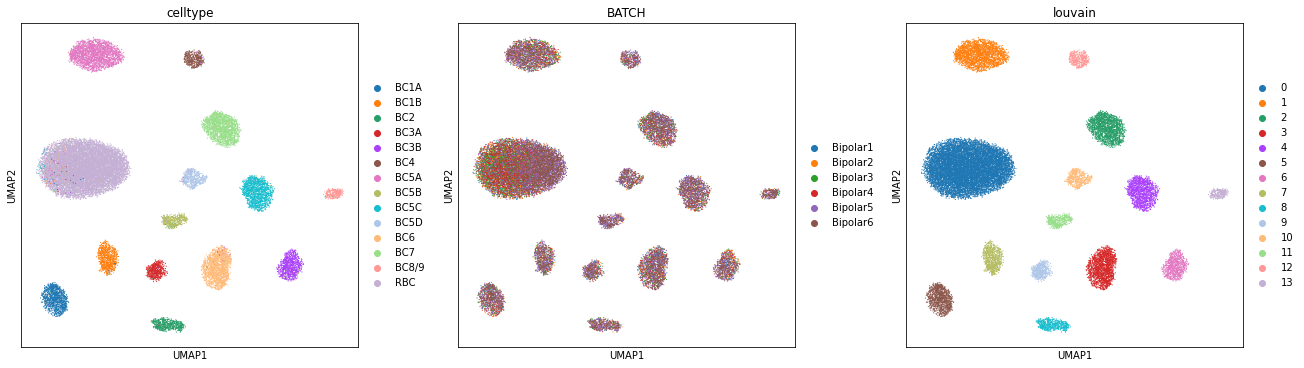

                 scDML(louvain)
ARI                       0.966
NMI                       0.934
ASW_label                 0.799
ASW_label/batch           0.953
BatchKL                   0.335
cLISI                     1.000
iLISI                     3.702


In [3]:
method="scDML"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype","louvain"])#
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scDML3_eva.columns=[method+"(louvain)"] ## modify column names
scDML3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
print(scDML3_eva)

adata_integrated.write_h5ad(save_dir+method+dataset+"_"+method+"_evaluated.h5ad")


# fastMNN

AnnData object with n_obs × n_vars = 23494 × 13166
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_mnn', 'X_umap'
    varm: 'MNN'
    obsp: 'distances'
AnnData object with n_obs × n_vars = 23494 × 50
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'ident', 'RNA_snn_res.0.8', 'seurat_clusters'
...................................................................................................
..........................................method=fastMNN.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=1.220703125):n_cluster=14
ARI: 0.9732593353527257
NMI: 0.9223318317174561
.................................. 

... storing 'orig.ident' as categorical
... storing 'celltype' as categorical
... storing 'celltype_com' as categorical
... storing 'BatchID' as categorical
... storing 'BATCH' as categorical
... storing 'ident' as categorical


ASW_label= 0.6178188323974609
ASW_label/batch= 0.9750788552743127
....................................... calculate all metric done .................................


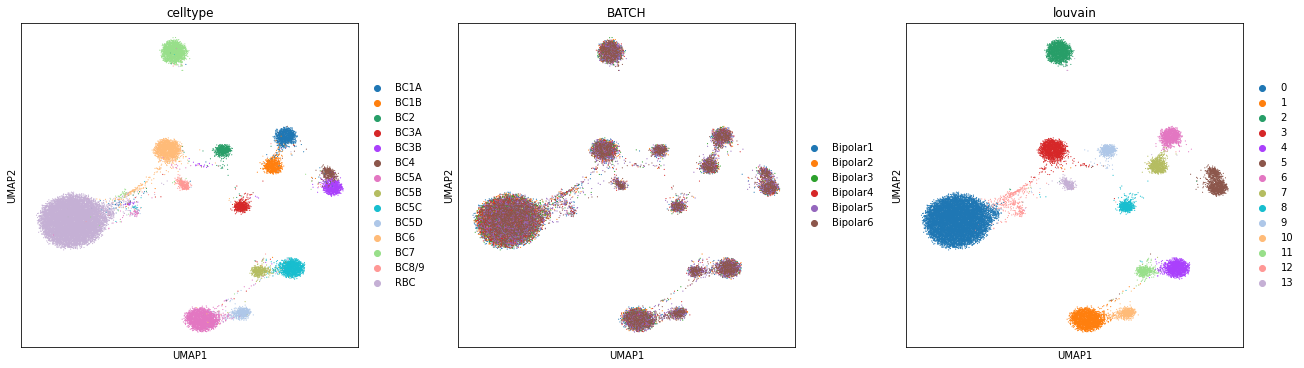

                 fastMNN
ARI                0.973
NMI                0.922
ASW_label          0.618
ASW_label/batch    0.975
BatchKL            0.341
cLISI              1.000
iLISI              3.148


In [4]:
method="fastMNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

adata_fastMNN=sc.read_h5ad(args_integrated)
print(adata_fastMNN)

adata_mnn=sc.AnnData(adata_fastMNN.obsm["X_mnn"])
adata_mnn.obs=adata_fastMNN.obs.copy()
print(adata_mnn)
# sc.tl.pca(adata_mnn)
# sc.pp.neighbors(adata_mnn)
# sc.tl.umap(adata_mnn)
# sc.pl.umap(adata_mnn,color=["BATCH","celltype"])
########################################################
adata_integrated=adata_mnn.copy()
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,fastMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

fastMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(fastMNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# harmony

AnnData object with n_obs × n_vars = 23494 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 23494 × 30
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'ident'
...................................................................................................
..........................................method=harmony.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.5035400390625):n_cluste

... storing 'celltype' as categorical
... storing 'BATCH' as categorical


ASW_label= 0.7011973559856415
ASW_label/batch= 0.9518372260605171
....................................... calculate all metric done .................................


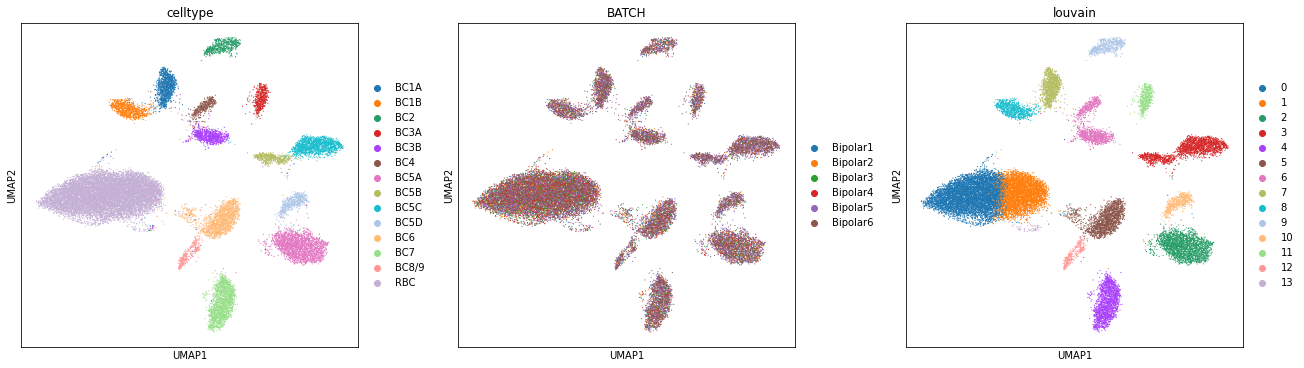

                 harmony
ARI                0.655
NMI                0.871
ASW_label          0.701
ASW_label/batch    0.952
BatchKL            0.228
cLISI              1.000
iLISI              4.181


In [5]:
method="harmony"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_harmony=sc.AnnData(adata_integrated.obsm["X_harmony"])
adata_harmony.obs=adata_integrated.obs.copy()
print(adata_harmony)
# sc.tl.pca(adata_harmony)
# sc.pp.neighbors(adata_harmony)
# sc.tl.umap(adata_harmony)
# sc.pl.umap(adata_harmony,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_harmony.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,harmony_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

harmony_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(harmony_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Seurat3

AnnData object with n_obs × n_vars = 23494 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'ident'
    var: 'features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
...................................................................................................
..........................................method=Seurat3.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.732421875):n_cluster=14
ARI: 0.6732761029067694
NMI: 0.8800901019072493
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.6342744

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 3.358152879092291
..................................        calculate ASW      .................

... storing 'orig.ident' as categorical
... storing 'celltype' as categorical
... storing 'celltype_com' as categorical
... storing 'BatchID' as categorical
... storing 'BATCH' as categorical
... storing 'ident' as categorical


ASW_label= 0.6873158812522888
ASW_label/batch= 0.9365403963526978
....................................... calculate all metric done .................................


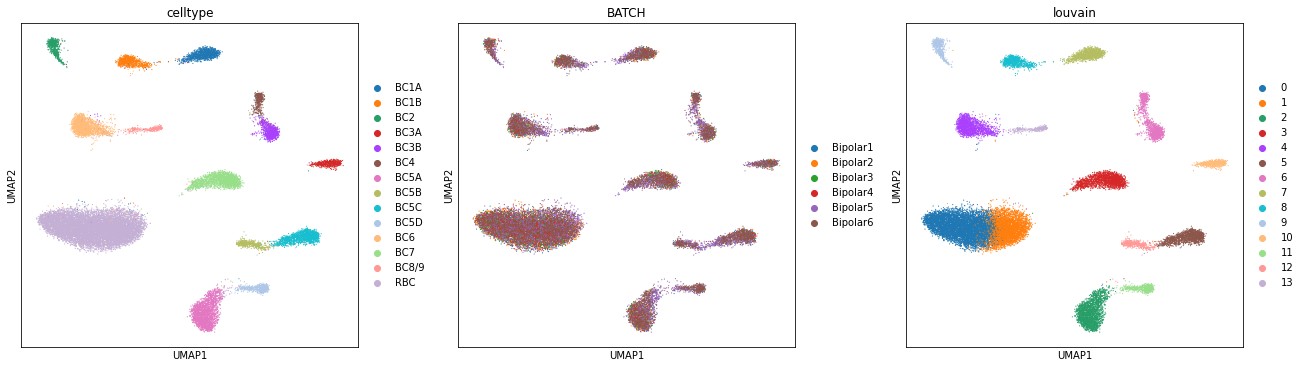

                 Seurat3
ARI                0.673
NMI                0.880
ASW_label          0.687
ASW_label/batch    0.937
BatchKL            0.634
cLISI              1.000
iLISI              3.358


In [6]:
###################################################################
method="Seurat3"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
sc.tl.pca(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
adata_integrated,Seurat3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

Seurat3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(Seurat3_eva)

adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama

AnnData object with n_obs × n_vars = 23494 × 1000
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=Scanorama.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.8544921875):n_cluster=14
ARI: 0.9703332640780212
NMI: 0.9197745799552896
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.9009752

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 2.786002676561656
..................................        calculate ASW      .............................

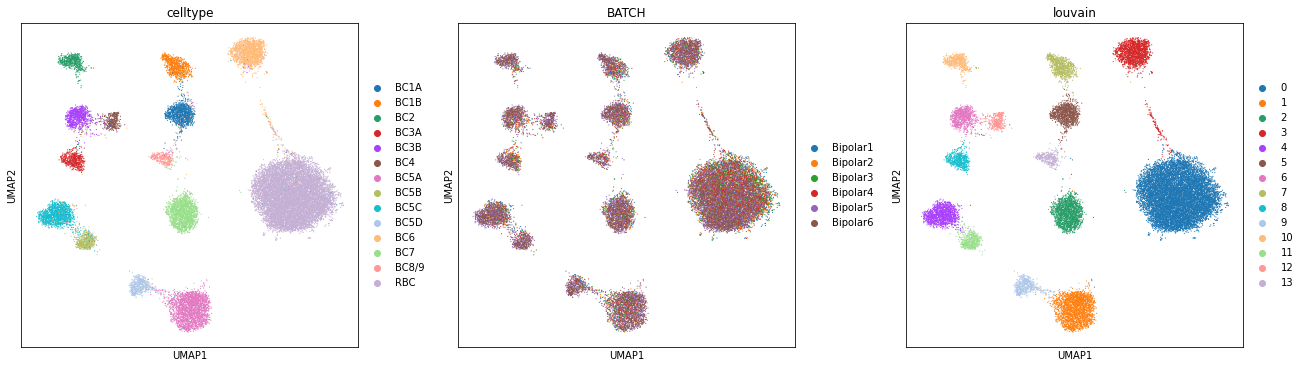

                 Scanorama
ARI                  0.970
NMI                  0.920
ASW_label            0.636
ASW_label/batch      0.851
BatchKL              0.901
cLISI                1.000
iLISI                2.786


In [7]:
###################################################################
method="Scanorama"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#

adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()

adata_integrated,scanorama_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

plt.show()

scanorama_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scanorama_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# INSCT

AnnData object with n_obs × n_vars = 23494 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=INSCT.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.18310546875):n_cluster=14
ARI: 0.307163336697352
NMI: 0.6963121246441506
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.2238342

.................................. calculate LISI..................................................
clisi= 1.0013659265421482
ilisi= 4.240836508022222
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.7147874087095261
ASW_label/batch= 0.8499832

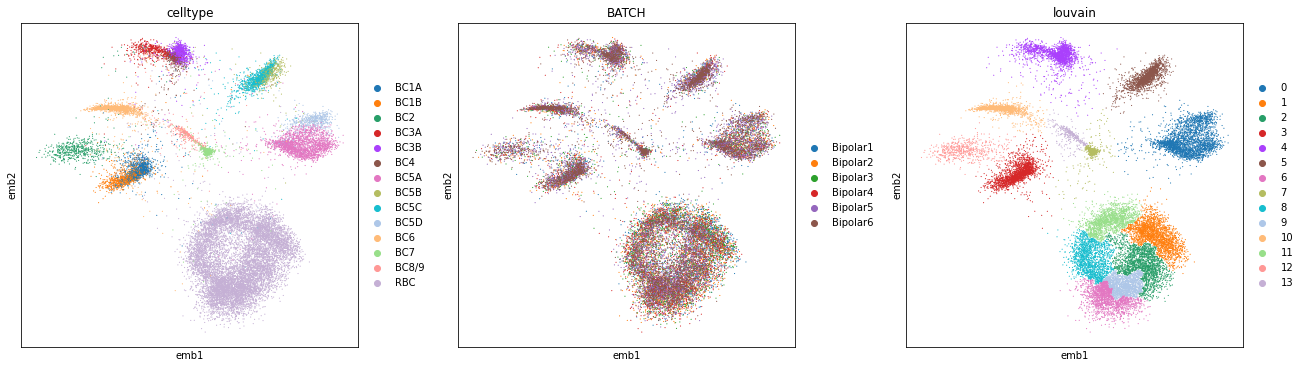

                 INSCT
ARI              0.307
NMI              0.696
ASW_label        0.715
ASW_label/batch  0.850
BatchKL          0.224
cLISI            1.001
iLISI            4.241


In [8]:
method="INSCT"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,INSCT_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

INSCT_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(INSCT_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BBKNN

AnnData object with n_obs × n_vars = 23494 × 2
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_emb'
...................................................................................................
..........................................method=BBKNN.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.1068115234375):n_cluster=14
ARI: 0.3565972132970515
NMI: 0.7436568685480376
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.2844218

.................................. calculate LISI..................................................
clisi= 1.0007732819497117
ilisi= 4.188688316517074
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label= 0.8165871798992157
ASW_label/batch= 0.8299

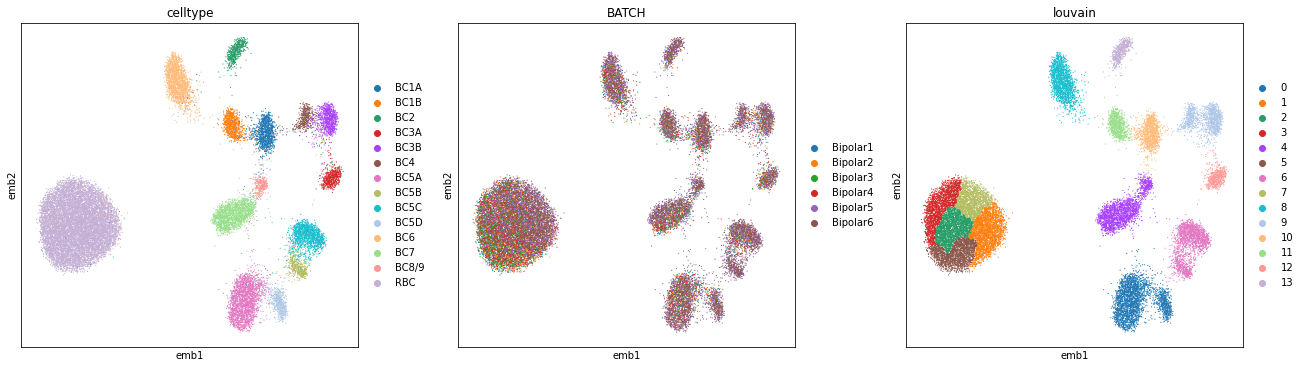

                 BBKNN
ARI              0.357
NMI              0.744
ASW_label        0.817
ASW_label/batch  0.830
BatchKL          0.284
cLISI            1.001
iLISI            4.189


In [9]:
method="BBKNN"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
# print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,BBKNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

BBKNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(BBKNN_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Liger

AnnData object with n_obs × n_vars = 23494 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'ident', 'clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_iNMF', 'X_iNMF_raw', 'X_umap'
    varm: 'INMF_RAW'
================================Visulizing the embedding data================================
AnnData object with n_obs × n_vars = 23494 × 20
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellname', 'celltype', 'celltype_com', 'celltypeID', 'BatchID', 'BATCH', 'ident', 'clusters'
...................................................................................................
..........................................method=liger.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.36621

... storing 'celltype' as categorical
... storing 'BATCH' as categorical


ASW_label= 0.7239559143781662
ASW_label/batch= 0.9700239927023716
....................................... calculate all metric done .................................


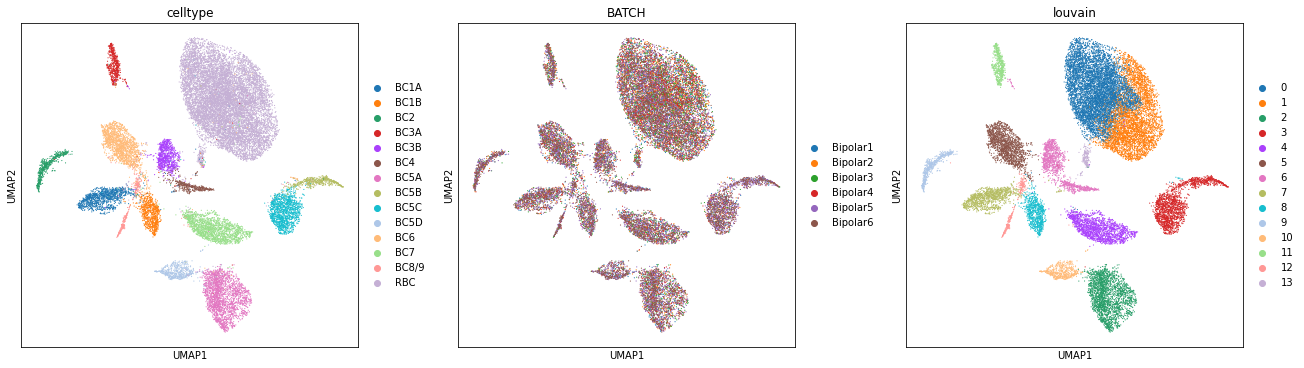

                 liger
ARI              0.644
NMI              0.845
ASW_label        0.724
ASW_label/batch  0.970
BatchKL          0.194
cLISI            1.000
iLISI            4.077


In [10]:
method="liger"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
print("================================Visulizing the embedding data================================")
adata_liger=sc.AnnData(adata_integrated.obsm["X_iNMF"])
adata_liger.obs=adata_integrated.obs.copy()
print(adata_liger)
# sc.tl.pca(adata_liger)
# sc.pp.neighbors(adata_liger)
# sc.tl.umap(adata_liger)
# sc.pl.umap(adata_liger,color=["BATCH","celltype"])# python中重新可视化数据，可以与R中对比验证一下

adata_integrated=adata_liger.copy()

adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

adata_integrated,liger_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#所有的图都是python画的，而没有用原始的图(例如原始的R图)
plt.show()

liger_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(liger_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BERMUDA

../evaluation/retina/BERMUDA/retina_BERMUDA_corrected.h5ad
AnnData object with n_obs × n_vars = 23494 × 20
    obs: 'celltype', 'BATCH'
    uns: 'BATCH_colors', 'celltype_colors'
    obsm: 'X_umap'
...................................................................................................
..........................................method=BERMUDA.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.9765625):n_cluster=14
ARI: 0.5763663875404069
NMI: 0.8032946778279826
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.2530893

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 3.9485488425942066
..................................        calculate ASW      ......................................
Silhouette score...
ASW_label=

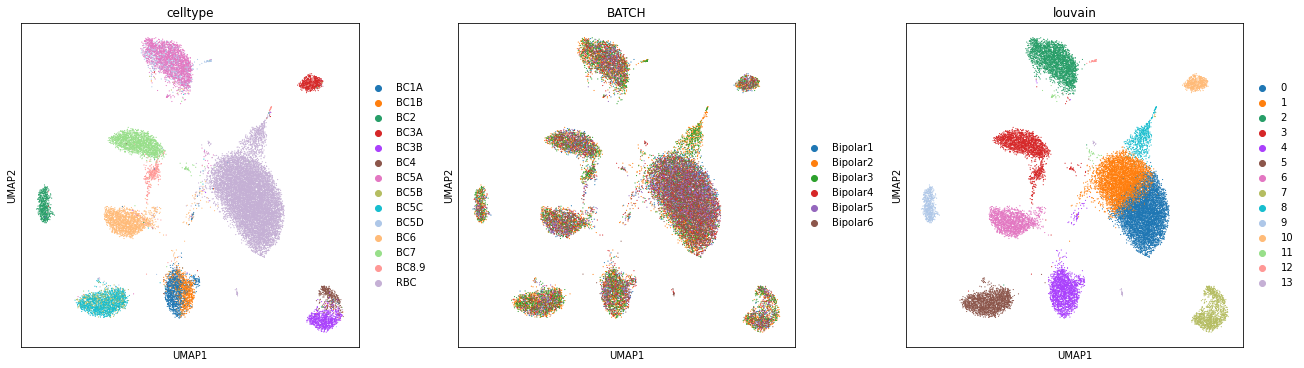

                 BERMUDA
ARI                0.576
NMI                0.803
ASW_label          0.667
ASW_label/batch    0.857
BatchKL            0.253
cLISI              1.000
iLISI              3.949


In [11]:
method="BERMUDA"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
if(os.path.exists(args_integrated)):
    print(args_integrated)
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
    # sc.tl.pca(adata_integrated)
    # sc.pp.neighbors(adata_integrated)
    # sc.tl.umap(adata_integrated)
    # sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,bermuda_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(bermuda_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
else:
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()    
    results = {
    'ARI': "--",
    'NMI': "--",
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    bermuda_eva = pd.DataFrame.from_dict(results, orient='index')
    bermuda_eva.columns=[method]
    bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    bermuda_eva
    #scDML_reassign

# scVI

AnnData object with n_obs × n_vars = 23494 × 10
    obs: 'BATCH', 'celltype'
    uns: 'BATCH_colors', 'celltype_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
...................................................................................................
..........................................method=scVI.............................................
..............................calculate ari nmi according to nceltype=14...........................
louvain clustering result(resolution=0.732421875):n_cluster=14
ARI: 0.682992087961528
NMI: 0.8707383009595621
.................................. calculate BatchKL  .............................................
BatchKL= [1] 0.1989508

.................................. calculate LISI..................................................
clisi= 1.0
ilisi= 4.030461455409652
..................................        calculate ASW      ......................................

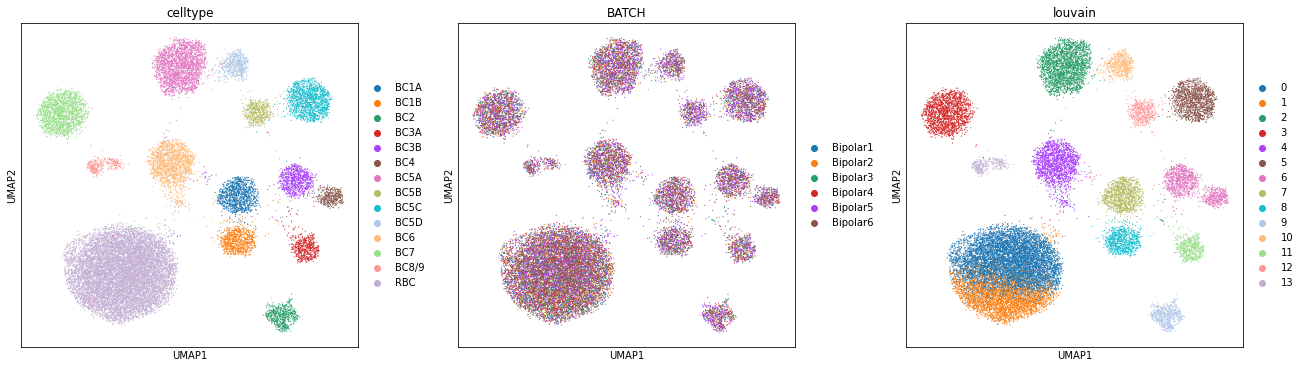

                  scVI
ARI              0.683
NMI              0.871
ASW_label        0.605
ASW_label/batch  0.968
BatchKL          0.199
cLISI            1.000
iLISI            4.030


In [12]:
method="scVI"
args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
adata_integrated=sc.read_h5ad(args_integrated)
print(adata_integrated)
#print("================================Visulizing the embedding data================================")
# sc.tl.pca(adata_integrated)
# sc.pp.neighbors(adata_integrated)
# sc.tl.umap(adata_integrated)
# sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
adata_integrated,scVI_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
plt.show()

scVI_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
print(scVI_eva)
adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# summary evaluation of all method to  table

In [13]:
#method_list=["tDCA","fastMNN","harmony","Seurat3","scanorama","INSCT","scVI","BBKNN","liger"]
method_list=["scDML","fastMNN","harmony","Seurat3","Scanorama","INSCT","BBKNN","liger","BERMUDA","scVI"]

df_ls=[]
for method in method_list:
    print(method)
    if(method=="scDML"):
        method_eva1=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
        df_ls.append(method_eva1)
        method_eva2=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
        df_ls.append(method_eva2)
    else:
        method_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
        df_ls.append(method_eva)

result = pd.concat(df_ls, join='outer', axis=1)
result.columns=["scDML(reassign)","scDML(louvain)"]+method_list[1:]
result.index.name=dataset ## add title for column names 
#result=result.round(3) ## only save 3 precision of float
result.to_csv(save_dir+dataset+"_evaluation.csv")
result
#liger

scDML
fastMNN
harmony
Seurat3
Scanorama
INSCT
BBKNN
liger
BERMUDA
scVI


,scDML(reassign),scDML(louvain),fastMNN,harmony,Seurat3,Scanorama,INSCT,BBKNN,liger,BERMUDA,scVI
retina,,,,,,,,,,,
ARI,0.966,0.966,0.973,0.655,0.673,0.970,0.307,0.357,0.644,0.576,0.683
NMI,0.934,0.934,0.922,0.871,0.880,0.920,0.696,0.744,0.845,0.803,0.871
ASW_label,--,0.799,0.618,0.701,0.687,0.636,0.715,0.817,0.724,0.667,0.605
ASW_label/batch,--,0.953,0.975,0.952,0.937,0.851,0.850,0.830,0.970,0.857,0.968
BatchKL,--,0.335,0.341,0.228,0.634,0.901,0.224,0.284,0.194,0.253,0.199
cLISI,--,1.000,1.000,1.000,1.000,1.000,1.001,1.001,1.000,1.000,1.000
iLISI,--,3.702,3.148,4.181,3.358,2.786,4.241,4.189,4.077,3.949,4.030


# Visulization of Evaluation

## ARI and NMI

In [14]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ARI_list=result.loc["ARI"].values
# NMI_list=result.loc["NMI"].values
# Name_list = list(result.columns)
# ax.scatter(ARI_list, NMI_list, c = colors) 
# ax.set_xlabel("ARI", fontsize = 10)
# ax.set_ylabel("NMI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ARI_list)):
#     ax.text(ARI_list[i], NMI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("Clustering Accuracy")    
# plt.savefig(save_dir+dataset+"_ARI_NMI.png")
# # ax=plt.subplot(1, 3, 3) 
# # kBET_list=result.loc["kBET"].values
# # batchKL_list=result.loc["BatchKL"].values
# # Name_list = list(result.columns)
# # ax.scatter(kBET_list, batchKL_list, c = colors) 
# # ax.set_xlabel("kBET", fontsize = 10)
# # ax.set_ylabel("BatchKL", fontsize = 10)
# # plt.xticks(fontsize = 10)
# # plt.yticks(fontsize = 10)
# # for i in range(len(kBET_list)):
# #     ax.text(kBET_list[i], batchKL_list[i], Name_list[i], c=colors[i],  fontsize=20, weight =1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# # plt.title("Mixing Accuracy")

## ASW

In [15]:
# # Plot LISI results 
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# ASW_list=result.loc["ASW_label"].values
# ASW_batch_list=1-result.loc["ASW_label/batch"].values
# Name_list = list(result.columns)
# ax.scatter(ASW_list, ASW_batch_list, c = colors) 
# ax.set_xlabel("ASW_label", fontsize = 10)
# ax.set_ylabel("1-ASW_label/batch", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(ASW_list)):
#     ax.text(ASW_list[i], ASW_batch_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("ASW")
# plt.savefig(save_dir+dataset+"_ASW.png")


## batchKL

In [16]:
# fig=plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# bKL=pd.DataFrame({"method":result.columns,"BatchKL":result.loc["BatchKL"].values})
# #bKL
# ax = sns.barplot(x = "method", y = "BatchKL", data=bKL)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.ylabel("BatchKL", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.title("BatchKL")
# plt.savefig(save_dir+dataset+"_BatchKL.png")

## iLISI和cLISI

In [17]:
# #colors=['black','red',"blue","orange","green","purple","yellow","pink","brown"]
# colors=['black','red',"blue","orange","green","purple","yellow","pink","cyan","gray"]
# plt.figure(figsize=(6,6))
# ax=plt.subplot(1, 1, 1) 
# cLISI_list=result.loc["cLISI"].values
# iLISI_list=result.loc["iLISI"].values
# Name_list = list(result.columns)
# ax.scatter(cLISI_list, iLISI_list, c = colors) 
# ax.set_xlabel("cLISI", fontsize = 10)
# ax.set_ylabel("iLISI", fontsize = 10)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# for i in range(len(cLISI_list)):
#     ax.text(cLISI_list[i], iLISI_list[i], Name_list[i], c=colors[i],  fontsize=15, weight = 1000, verticalalignment='center', horizontalalignment='right',rotation=0)
# plt.title("LISI")    
# plt.savefig(save_dir+dataset+"_LISI.png")